# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [3]:
# Load dataset
file_path = Path("Resources/lending_data.csv")
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
df["loan_status"].value_counts()
X = df.drop("loan_status", axis=1)
y = df["loan_status"].values

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [5]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X.columns


Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt'],
      dtype='object')

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

# Logistic Regression Model

In [6]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
#Extras!!! - Confusion matrix - Manual calculation of accuracy!!!
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print(f'True Positives (1,1)  = {tp}')
print(f'True Negatives (0,0) = {tn}')
print(f'False Positive (0,0) = {fp}')
print(f'False Negatives (0,1) = {fn}')

accuracy = (tp + tn) / (tp + fp + tn + fn)
print(accuracy)


True Positives (1,1)  = 563
True Negatives (0,0) = 18663
False Positive (0,0) = 102
False Negatives (0,1) = 56
0.9918489475856377


Precision is the percentage of correct positive predictions relative to total positive predictions
Simply put, within everything that has been predicted as positive, what is the percentage that is correct
* Precision = # of True Positive / (# of True Positive + # of False Positive)

Recall is the percentage of correct positive predictions relative to total actual positives
Simply put, within everything that actually is positive, how many did the model succeed to find
* Recall = # of True Positive / (# of True Positive + # of False Negative)

The F1-score is a measure of how well the model balances precision and recall.

In [8]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



* Since the data is imbalanced based on the support values for class 0 and 1, accuracy is not the right metric, because this cannot distinguishh between specific type of errors
* It cannot differentiate between false positives and false negatives. We have to rely on the precision and recall scores

* 1 - The model correctly predicted 100% of them out of all predictions for that class 0.
* 2 - It found 99% of them out of all actual loans of class 0.
* 3 - And the model appears to be well balanced, between accuracy and recall which is expressed by the f1-score for class 0.
* 4 - The number of samples for class 0 is higher than samples available for class 1. This is explained by the respective higher support numbers for class 0.

In [9]:
print(classifier.coef_)

[[ 4.60888714e-03 -2.68144046e-08 -1.15831857e-03  1.90541720e-05
  -2.01070597e-06  7.62267938e-05  2.61927387e-04]]


In [11]:
# ycord = np.vectorize(np.float16)
# plt.bar(X.columns,ycord(classifier.coef_))
# plt.show()

In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


# Random Forest Classifier

In [13]:
# Train a Random Forest Classifier model and print the model score
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

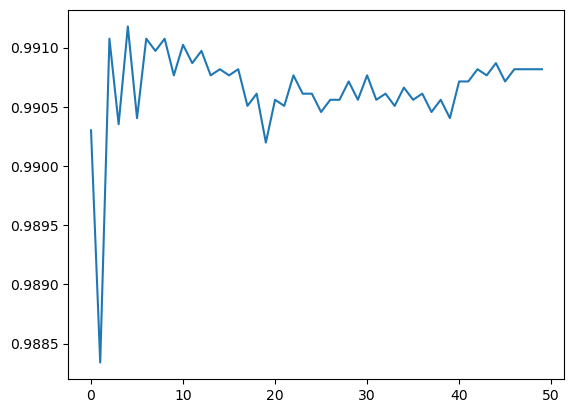

score: 0.9908171687990095


In [14]:
plt.plot(scores)
plt.show()
print(f'score: {score}')

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.9974893382858715
Testing Score: 0.9910751134956666


In [16]:
#Extras!!! - Confusion matrix - Manual calculation of accuracy!!!
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[18666,    99],
       [   74,   545]], dtype=int64)

In [17]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.88      0.86       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384



## Conclusion
* Since there is a support imbalance between data samples of class 0 and class 1, decision will have to be made based on the f1-score and not based on accuracy

* By comparing the f1-score, Logistic regression appears to have a slight edge over random forest for the given dataset